In [3]:
#First we import everything
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import re
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [4]:
df_churndata1 = pd.read_csv("TelcoCustomerChurn[MODIFIED].csv", index_col=0)
df_churndata1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,0.000000,0,0,1,0,...,0,0,0,0,0,1,0,0.115423,0.001275,0
1,5575-GNVDE,1,0,0,0,0.464789,1,0,1,1,...,1,0,0,0,1,0,1,0.385075,0.215867,0
2,3668-QPYBK,1,0,0,0,0.014085,1,0,1,1,...,0,0,0,0,0,1,1,0.354229,0.010310,1
3,7795-CFOCW,1,0,0,0,0.619718,0,0,1,1,...,1,1,0,0,1,0,0,0.239303,0.210241,0
4,9237-HQITU,0,0,0,0,0.014085,1,0,1,0,...,0,0,0,0,0,1,0,0.521891,0.015330,1


In [5]:
# We store our churn column in a separate variable and drop it from dataset

churn = df_churndata1.pop('Churn')
churn[:5]

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [6]:
df_churndata1 = df_churndata1.drop(columns="customerID")

In [7]:
#split the data into training and testing

data_train, data_test, target_train, target_test = train_test_split(df_churndata1, churn, test_size = 0.25)

In [8]:
#Baseline tree classifier

tree_churn = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree_churn.fit(data_train, target_train)
tree_churn.score(data_test, target_test)

0.7815699658703071

In [9]:
#Baseline tree feature importance

for feature, importance in zip(df_churndata1.columns, tree_churn.feature_importances_):
    print("{} -> {}".format(feature, importance))

gender -> 0.0
SeniorCitizen -> 0.00968374604558861
Partner -> 0.0
Dependents -> 0.0015344585520843906
tenure -> 0.16714146040147002
PhoneService -> 0.0
MultipleLines -> 0.0
InternetService -> 0.007690068298069462
OnlineSecurity -> 0.010727645301742358
OnlineBackup -> 0.0
DeviceProtection -> 0.0
TechSupport -> 0.025467576854641544
StreamingTV -> 0.0
StreamingMovies -> 0.0033640023635608633
Contract -> 0.5424015992420617
PaperlessBilling -> 0.0
PaymentMethod -> 0.0
MonthlyCharges -> 0.18115038167483524
TotalCharges -> 0.050839061265945874


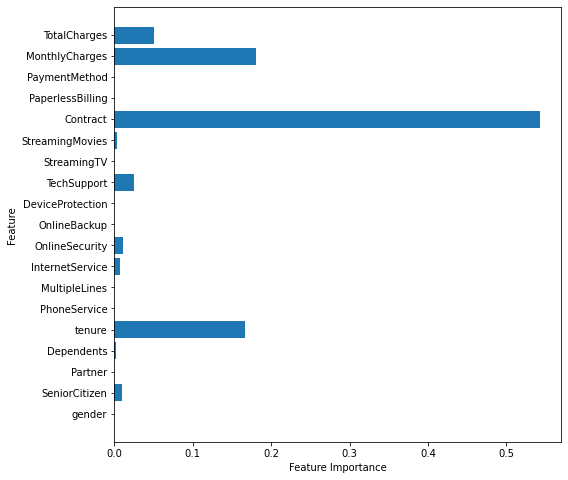

In [10]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data_train.columns.values)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    
plot_feature_importances(tree_churn)

In [11]:
#prediction with basic tree

pred = tree_churn.predict(data_test)
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))


# The results will vary but I ran it once and got the below
#True positives = 1190
#True negatives = 209


#false positives = 112
#false negatiaves = 247

[[1220   66]
 [ 318  154]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1286
           1       0.70      0.33      0.45       472

    accuracy                           0.78      1758
   macro avg       0.75      0.64      0.65      1758
weighted avg       0.77      0.78      0.75      1758



In [12]:
churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [13]:
#bagged trees

bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth= 5), n_estimators=20)

In [14]:
bagged_tree.fit(data_train, target_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [15]:
bagged_tree.score(data_train, target_train)

0.8052711414486159

In [16]:
bagged_tree.score(data_test, target_test)

0.7832764505119454

In [17]:
#Random Forests

forest = RandomForestClassifier(n_estimators=1000, max_depth=5, max_features=10)

In [18]:
forest.fit(data_train, target_train)

RandomForestClassifier(max_depth=5, max_features=10, n_estimators=1000)

In [19]:
forest.score(data_train, target_train)

0.8102009859689041

In [20]:
forest.score(data_test, target_test)

0.782707622298066

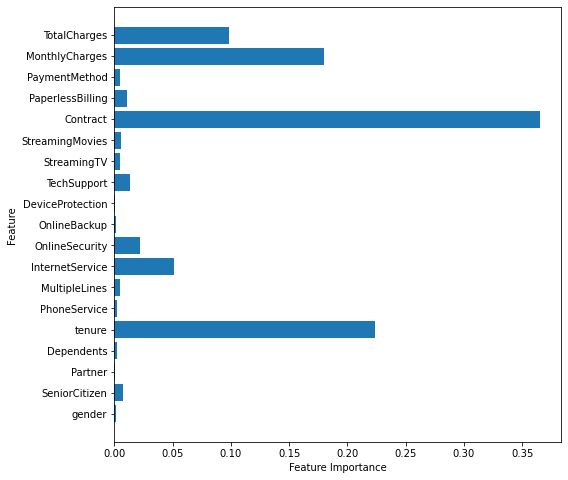

In [21]:
plot_feature_importances(forest)

In [22]:
#Baseline tree feature importance

for feature, importance in zip(df_churndata1.columns, forest.feature_importances_):
    print("{} -> {}".format(feature, importance))

gender -> 0.0011403571852557878
SeniorCitizen -> 0.0077594428908327245
Partner -> 0.0008995799173015809
Dependents -> 0.001985183964614089
tenure -> 0.2235123226964114
PhoneService -> 0.0017846817244554123
MultipleLines -> 0.0050857168540240595
InternetService -> 0.0515060893835582
OnlineSecurity -> 0.02153967713661337
OnlineBackup -> 0.0015383815412545237
DeviceProtection -> 0.0008766023340920646
TechSupport -> 0.013758820994071571
StreamingTV -> 0.005030515777990811
StreamingMovies -> 0.0055844151227006636
Contract -> 0.36490175318969076
PaperlessBilling -> 0.010475838065452792
PaymentMethod -> 0.0046993431830539
MonthlyCharges -> 0.17974770055930261
TotalCharges -> 0.09817357747932365


In [23]:
importances = pd.DataFrame({'feature':data_train.columns,'importance':np.round(forest.feature_importances_,3)})

In [24]:
importances = importances.sort_values('importance',ascending=False).set_index('feature')

<AxesSubplot:xlabel='feature'>

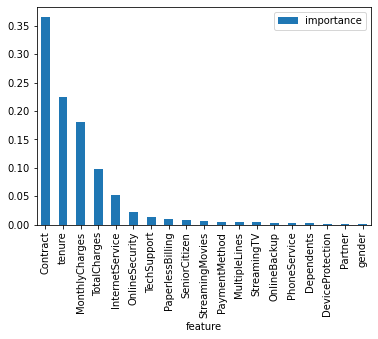

In [25]:
importances.plot.bar()

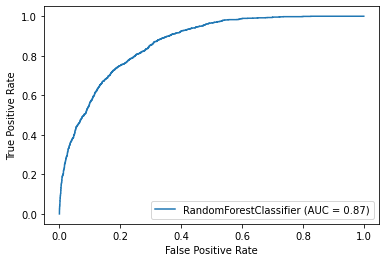

In [26]:
# plotting the ROC Curve

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
plot_roc_curve(forest, data_train, target_train)

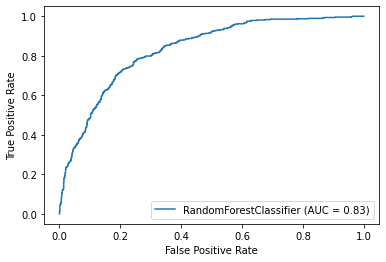

In [27]:
plot_roc_curve(forest, data_test, target_test)

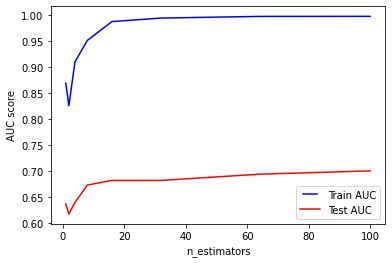

In [28]:
#num forests
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100]
# I removed 200, 500, 1000 because it was just leading to 1.00, maybe keep it in?
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(data_train, target_train)
   train_pred = rf.predict(data_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(data_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

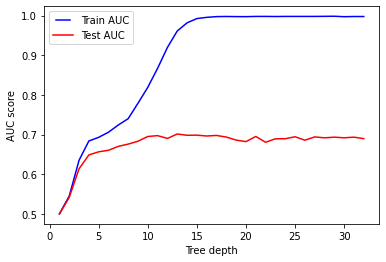

In [30]:
# maxdepth
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(data_train, target_train)
   train_pred = rf.predict(data_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(data_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

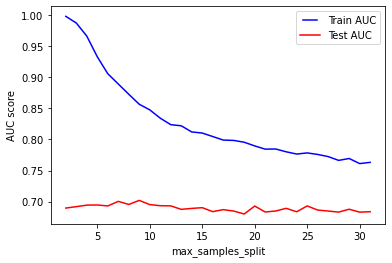

In [44]:
#nume_samples_split
max_samples_split = np.arange(2,32,1)
train_results = []
test_results = []
for min_sample_split in max_samples_split:
   rf = RandomForestClassifier(min_samples_split=min_sample_split, n_jobs=-1)
   rf.fit(data_train, target_train)
   train_pred = rf.predict(data_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(data_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_samples_split, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_samples_split, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_samples_split')
plt.show()

In [ ]:
max_samples_split = np.arange(2,32,1)
max_samples_split

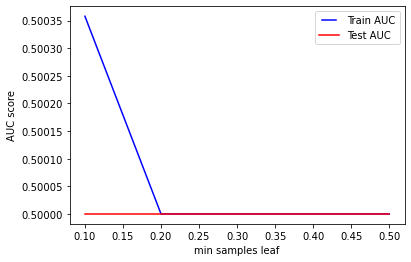

In [45]:
#maxleaves
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
   rf.fit(data_train, target_train)
   train_pred = rf.predict(data_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(data_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

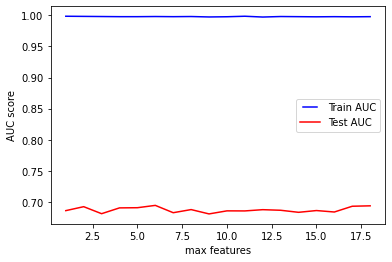

In [48]:
#maxfeatures
max_features = list(range(1,df_churndata1.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   rf = RandomForestClassifier(max_features=max_feature)
   rf.fit(data_train, target_train)
   train_pred = rf.predict(data_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(data_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_features, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

In [49]:
max_features = list(range(1,df_churndata1.shape[1]))
max_features

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [ ]:
#I want to try GridsearchCV
#I want to check, is this the best way to tune my hyperparams? 
#does it even matter?
# do they require a visual tree for the project?
